### Exploratory Data Analysis with GGPlot2 & Plotnine
Ggplot2 is based on the grammar of graphics, the idea that you can build every graph from the same few components: a data set, a set of geoms (visual marks that represent data points), and a coordinate system.

the grammar tells us that a statistical graphic is a mapping from data to aesthetic attributes
(colour, shape, size) of geometric objects (points, lines, bars). The plot may
also contain statistical transformations of the data and is drawn on a specific
coordinate system. 

In [1]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [2]:
from plotnine import *
from plotnine.data import mpg
import pandas as pd
import numpy as np
%matplotlib inline

We'll use the 'mpg' dataset which contains the following variables:

Cty and hwy record miles per gallon for city and highway driving.
Displ is the engine displacement in litres
Drv is the drivetrain: front wheel (f), rear wheel ® or four wheel (4)
Model is the model of the car
Class is a categorical variable describing the type of car: two seater, SUV, compact...

In [3]:
mpg.head()
#hp is horsepower
#wt is weight

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### GGplot syntax
First, we'll understand what's the syntax to use in Plotnine to visualize a set of variables.

We first define the dataset, then the aesthetics and, at last, the marks/geometries to use

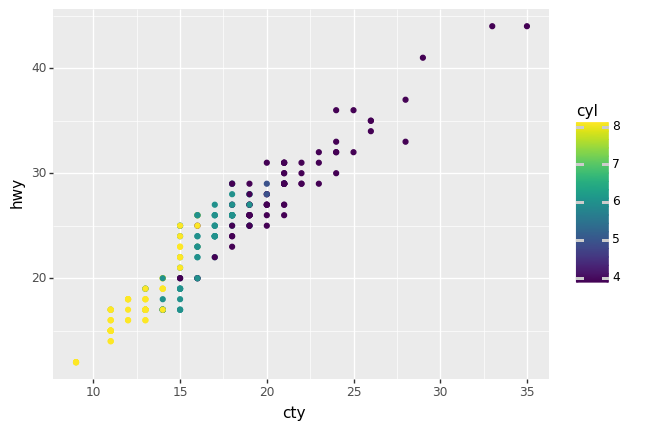

<ggplot: (121336432258)>

In [4]:
(ggplot(mpg, aes('cty', 'hwy', color="cyl"))
 + geom_point())

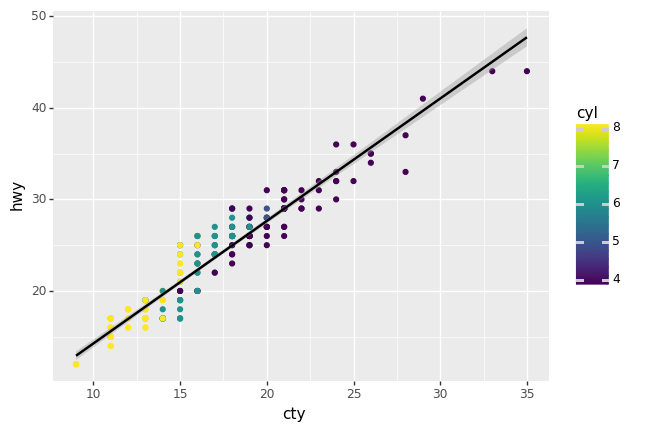

<ggplot: (121336440028)>

In [5]:
(ggplot(mpg, aes('cty', 'hwy', color="cyl"))
 + geom_point()) + geom_smooth(method="lm")

## Visualizing one variable
**Continuous X**

A variable is continuous if it can take any of an infinite set of ordered values. Numbers and date-times are two examples of continuous variables. To examine the distribution of a continuous variable, use a histogram

C:\Users\roser\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


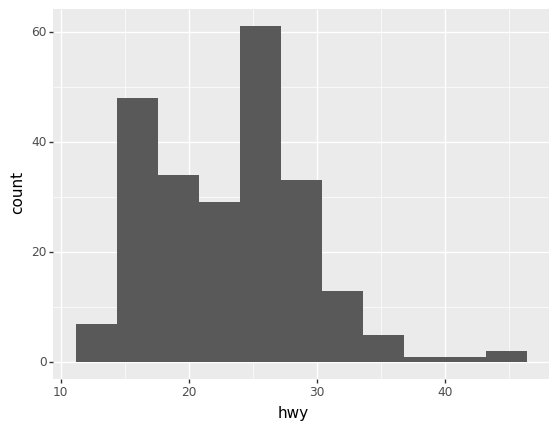

<ggplot: (121336962320)>

In [6]:
(ggplot(mpg, aes('hwy')) + geom_histogram())

In [7]:
ggplot(aes(x='x'), data=df) +\
    geom_line(aes(y='a'), color='blue') +\
    geom_line(aes(y='b'), color='red') +\
    geom_line(aes(y='c'), color='green')

NameError: name 'df' is not defined

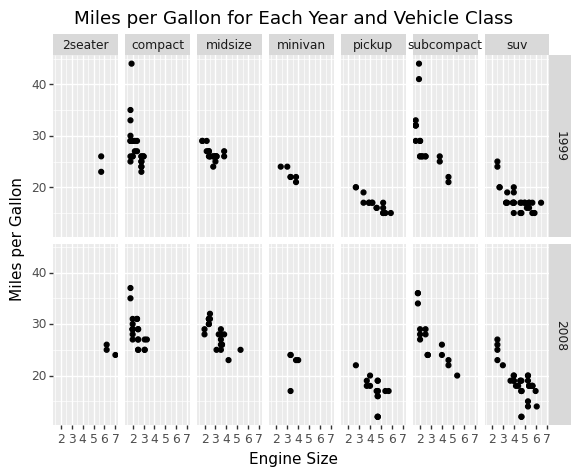

<ggplot: (121337734916)>

In [8]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point

(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
)

The height of the bars displays how many observations occurred with each x value. 

You can set the width of the intervals in a histogram with the binwidth argument, which is measured in the units of the x variable. You should always explore a variety of binwidths when working with histograms, as different binwidths can reveal different patterns.

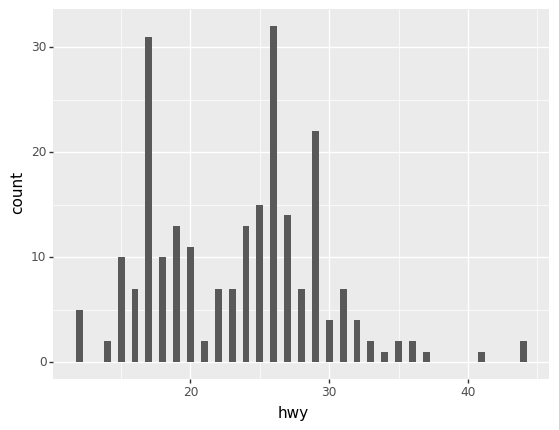

<ggplot: (121338881524)>

In [9]:
(ggplot(mpg, aes('hwy')) + geom_histogram(binwidth=.5))

In [10]:
a = ggplot(mpg, aes('hwy'))

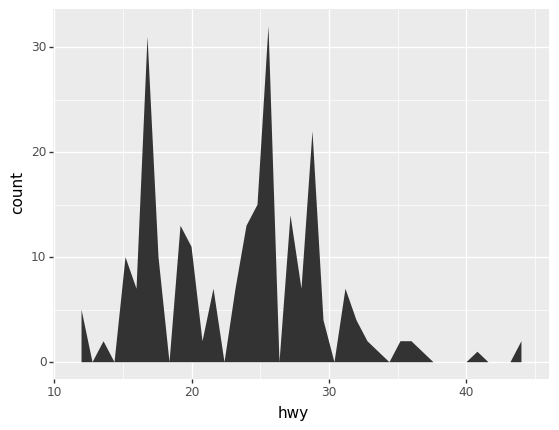

<ggplot: (121336432171)>

In [11]:
a + geom_area(stat="bin", binwidth=.8)

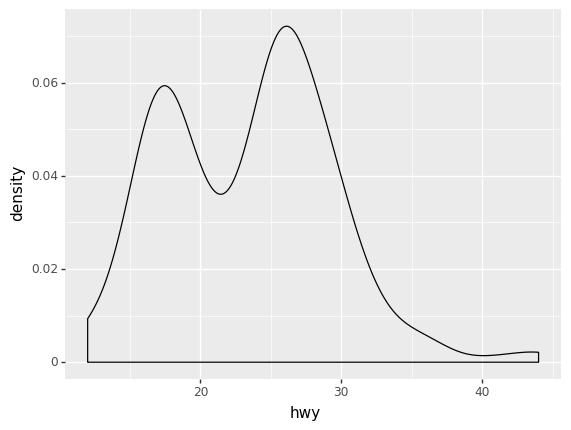

<ggplot: (121337019700)>

In [12]:
a + geom_density()

C:\Users\roser\anaconda3\lib\site-packages\plotnine\stats\stat_bindot.py:102: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


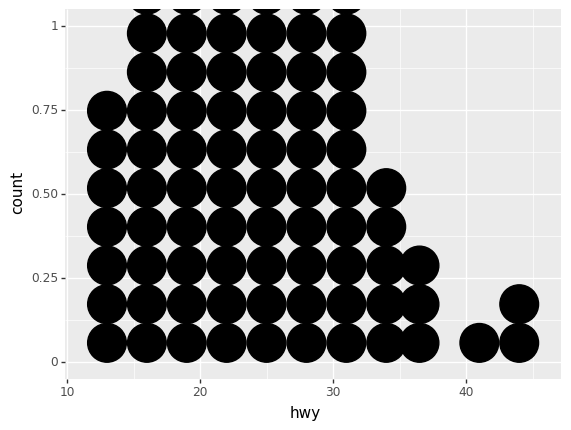

<ggplot: (121336940797)>

In [13]:
a + geom_dotplot()

If you want to overlay multiple histograms in the same plot, it’s always better to use geom_freqpoly() instead of geom_histogram(). geom_freqpoly() performs the same calculation as geom_histogram(), but instead of displaying the counts with bars, uses lines instead. It’s much easier to understand overlapping lines than bars.

C:\Users\roser\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


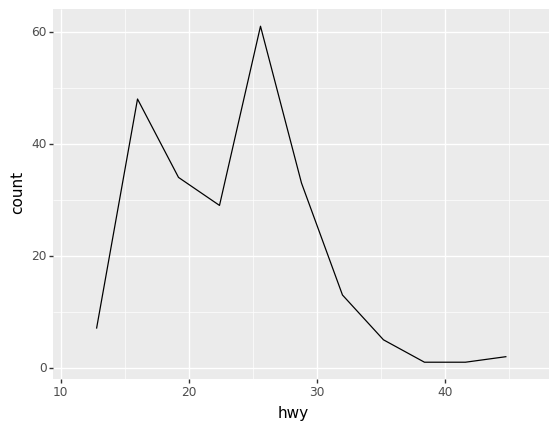

<ggplot: (121337082573)>

In [14]:
a + geom_freqpoly()

C:\Users\roser\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


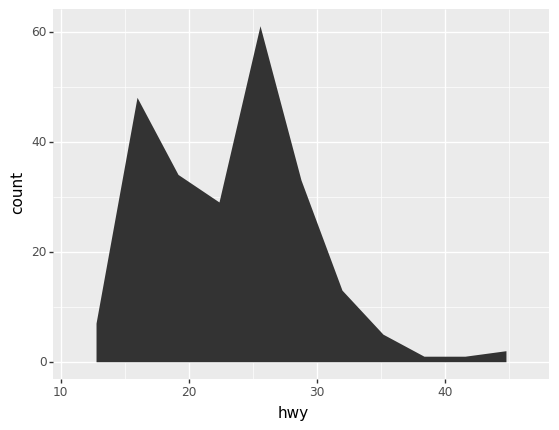

<ggplot: (121337516156)>

In [15]:
a + geom_area(stat="bin")

### Discrete variable distribution

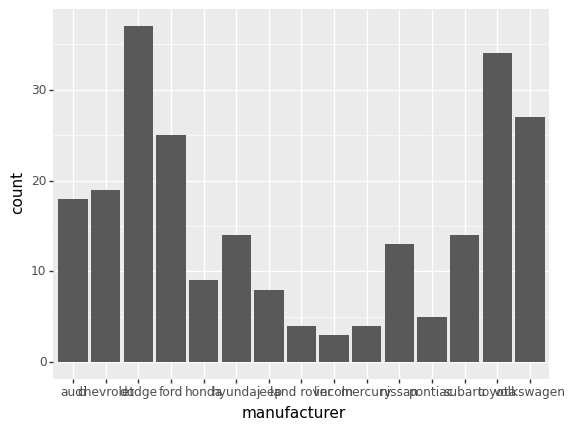

<ggplot: (121337147386)>

In [16]:
(ggplot(mpg, aes('manufacturer')) + geom_bar())

### Visualizing two variables

Let´s explore the relationship, if any, of the engine displacement in miles drove in highway.
Continuous X, continuous Y

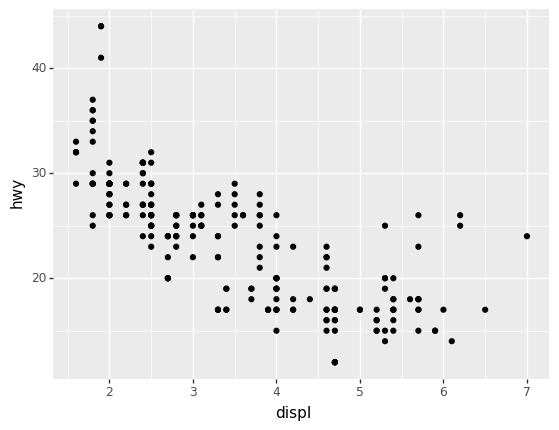

<ggplot: (121337162153)>

In [17]:
(ggplot(mpg, aes('displ', 'hwy')) + geom_point())

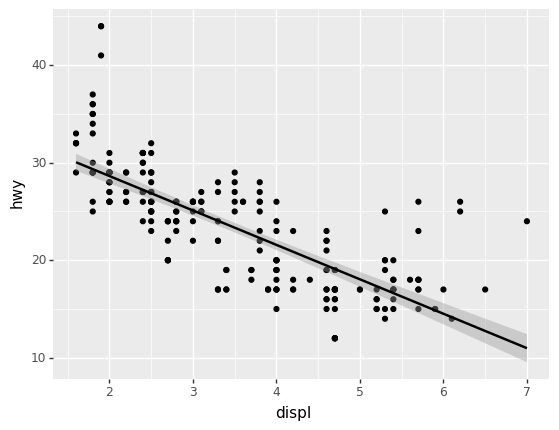

<ggplot: (121338801646)>

In [18]:
(ggplot(mpg, aes('displ', 'hwy')) + geom_point() + geom_smooth(method="lm"))

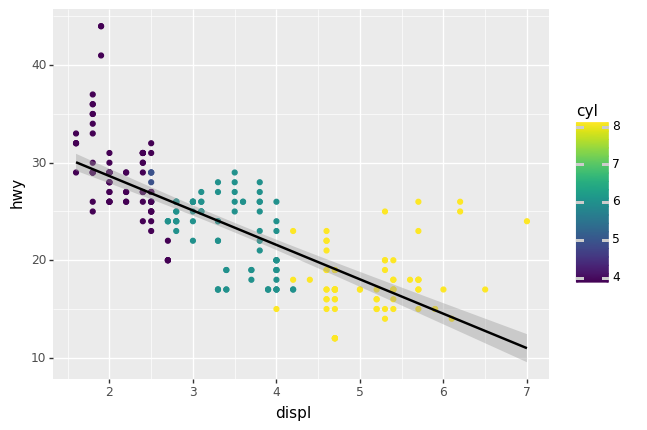

<ggplot: (121338816702)>

In [19]:
(ggplot(mpg, aes('displ', 'hwy', colour='cyl')) + geom_point() + geom_smooth(method="lm"))

### Shape, size and color

We can add additional variables to a plot, either with colour, size or shape. They work just like the x and y aesthetics, and are added into the call to aes.

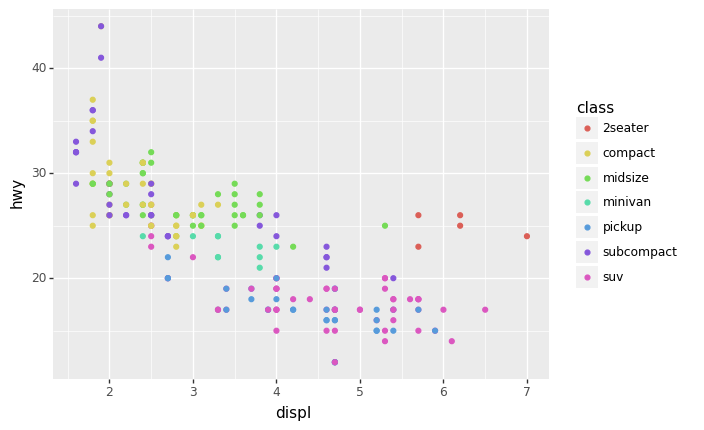

<ggplot: (121338808706)>

In [20]:
(ggplot(mpg, aes('displ', 'hwy', colour='class')) + geom_point())

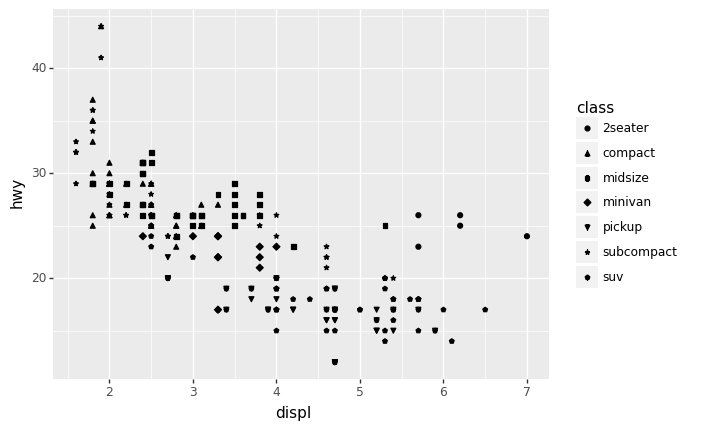

<ggplot: (121340062742)>

In [21]:
(ggplot(mpg, aes('displ', 'hwy', shape='class')) + geom_point())

C:\Users\roser\anaconda3\lib\site-packages\plotnine\scales\scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


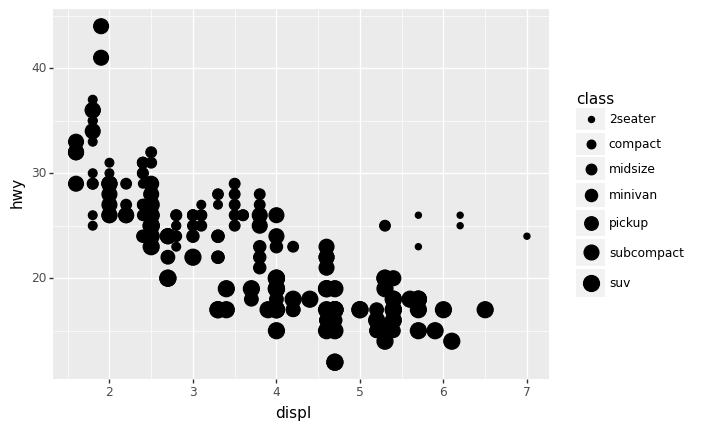

<ggplot: (121340214498)>

In [22]:
(ggplot(mpg, aes('displ', 'hwy', size='class')) + geom_point())

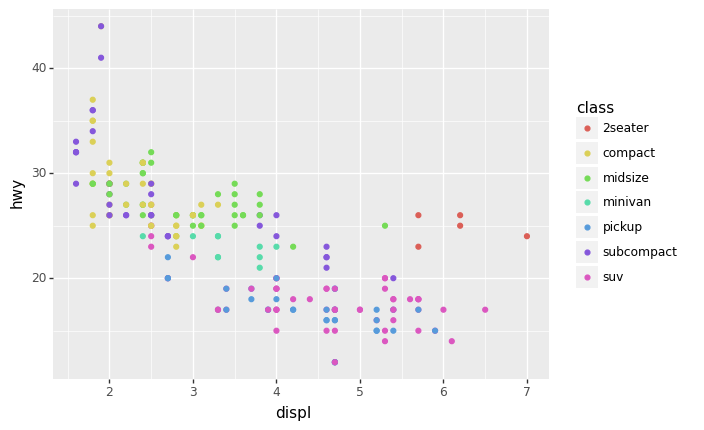

<ggplot: (121340214441)>

In [23]:
(ggplot(mpg, aes('displ', 'hwy', colour='class')) + geom_point())

### One categorical and continuous variable
We’re interested in seeing how fuel economy varies within car class.
Let’s get started with a scatterplot:

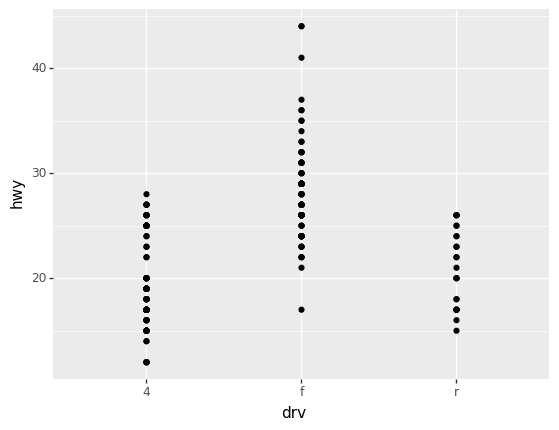

<ggplot: (121340211408)>

In [24]:
(ggplot(mpg, aes('drv','hwy')) + geom_point())

Because there are few uniques values of both class and hwy, there is a lot of overplotting.
Many points are plotted in the same location, but there are useful techniques to solve this problem:
(ggplot(mpg, aes('drv','hwy')) + geom_jitter())

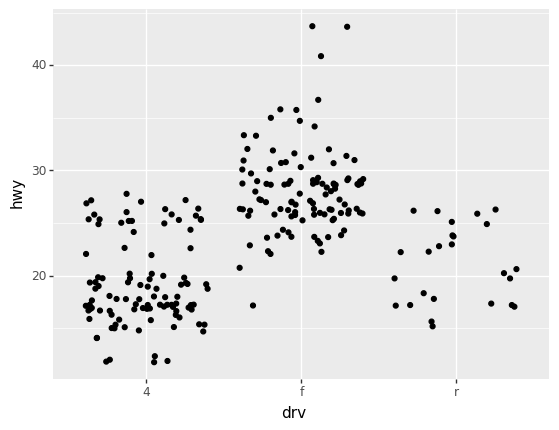

<ggplot: (121340437568)>

In [25]:
(ggplot(mpg, aes('drv','hwy')) + geom_jitter())

geom_jitter() adds a little random noise to the data which can help avoid overplotting.

Below, we'll use geom_violin, which shows a compact representation of the “density” of the distribution,
highlighting areas where more points are found.

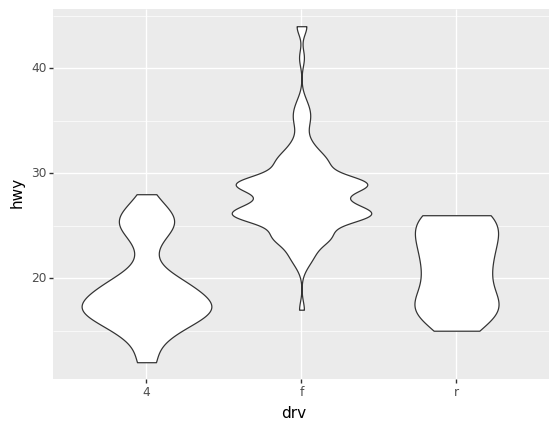

<ggplot: (121340626408)>

In [26]:
(ggplot(mpg, aes('drv','hwy')) + geom_violin())

But the **best alternative to visualize a a continuos and a categorical variable is the boxplot**.
A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians

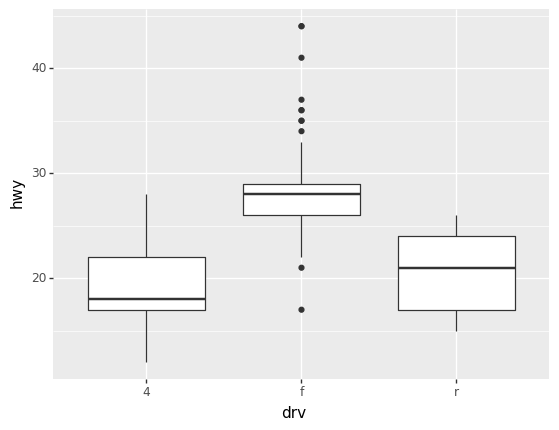

<ggplot: (121340655415)>

In [27]:
#Take the class variable in the mpg dataset. You might be interested to know how highway
#mileage varies across classes
(ggplot(mpg, aes('drv','hwy')) + geom_boxplot())

Now, take the class variable in the mpg dataset. You might be interested to know how highway
#mileage varies across classes. 

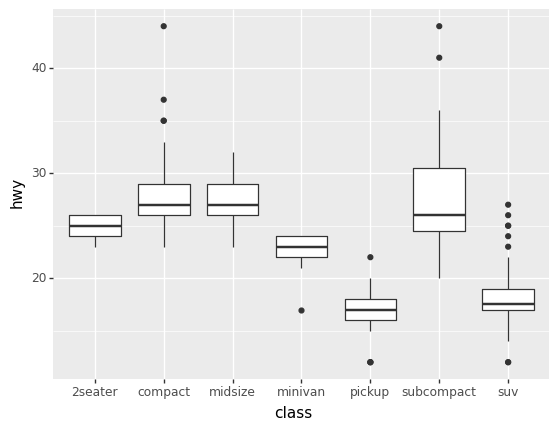

<ggplot: (121340028320)>

In [28]:
(ggplot(mpg, aes('class','hwy')) + geom_boxplot())

If you have long variable names, geom_boxplot() will work better if you flip it 90°. You can do that with coord_flip().

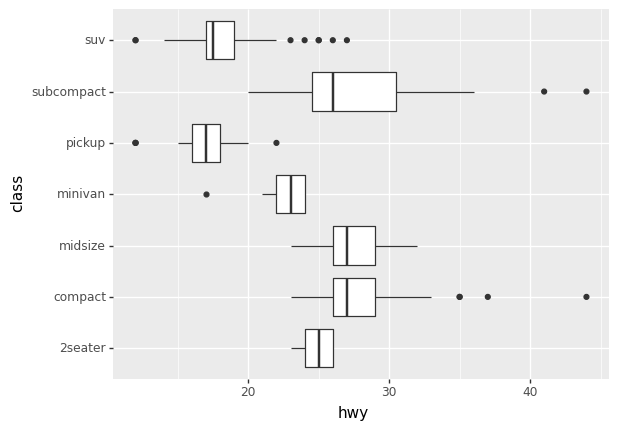

<ggplot: (121337153305)>

In [29]:
(ggplot(mpg, aes('class','hwy')) + geom_boxplot()) + coord_flip()

### Facetting

Is another technique for displaying additional categorical variables on a plot. 
Creates tables of graphics by splitting the data into subsets and displaying the same graph for each subset. There are two types: grid and wrapped, but we’ll look at wrapped, which subsets the data based on one categorical variable. 

We’ll use it to explore the three way relationship between fuel economy, engine size and number of cylinders.


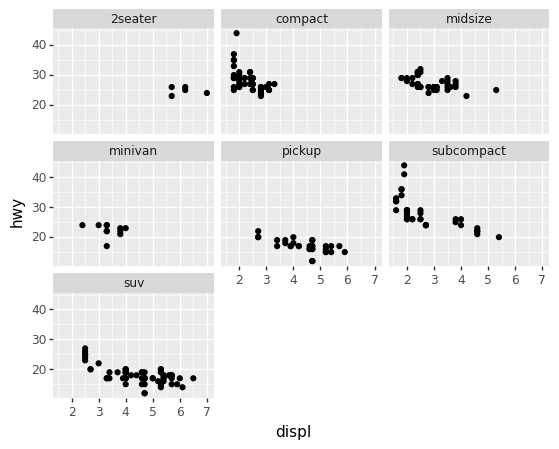

<ggplot: (121340391132)>

In [30]:
#Facetting
(ggplot(mpg, aes('displ', 'hwy')) + geom_point() + facet_wrap('class'))

In [31]:
ggplot(mpg) + geom_line(aes(x='displ')) +\
    geom_line(aes(y='a'), color='blue') +\
    geom_line(aes(y='b'), color='red') +\
    geom_line(aes(y='c'), color='green')

PlotnineError: "Could not evaluate the 'y' mapping: 'b' (original error: name 'b' is not defined)"

In [32]:
(ggplot(mpg) + 
  geom_density(aes(x = 'hwy', fill = 'drv')) + 
  facet_grid(rows = vars('drv')))




TypeError: vars() argument must have __dict__ attribute

In [ ]:
(ggplot(mpg, aes('displ')) + geom_bar() + facet_grid(rows = vars('drv')))

In [ ]:
#You can also define the number of columns in the facet
(ggplot(mpg, aes('displ')) + geom_line() + facet_wrap('drv', ncol=4)
+ labs(x="displacement", y="highway consumption"))

### Time series analysis

In [ ]:
from plotnine.data import economics

In [ ]:
economics.head()

In [ ]:
(ggplot(economics, aes(x='date', y='uempmed'))
    + geom_line() # line plot
    + labs(x='date', y='median duration of unemployment'))

### Axes, titles and labels
xlab() and ylab() are useful helpers to make the most common modifications to our labels


In [ ]:
(ggplot(mpg, aes('cty', 'hwy')) + geom_point(alpha=1/3)) + xlab("City driveway") + ylab("Highway consumption")

You can also modify the limit of the axes with xlim and ylim:

In [ ]:
(ggplot(mpg, aes('drv', 'hwy')) + geom_jitter(width = 0.25) + xlim("f", "r") + ylim(20, 30))

For adding a title, use ggititle()

In [ ]:
(ggplot(mpg, aes('drv', 'hwy')) + geom_jitter(width = 0.25) + xlim("f", "r") + ylim(20, 30)) + ggtitle("Consumption")

**Saving a graph**

In [ ]:
p = (ggplot(mpg, aes('drv', 'hwy')) + geom_jitter(width = 0.25) + xlim("f", "r") + ylim(20, 30)) + ggtitle("Consumption")

In [ ]:
ggsave(plot=p, filename="plot.png", dpi=1000)

In [ ]:
ggplot(mpg, aes('displ')) + geom_freqpoly()  + facet_wrap('drv')

In [ ]:
ggplot(mpg, aes(x='displ',fill='drv')) + \
    geom_bar(stat = 'count') + facet_wrap('drv')

In [ ]:
ggplot(mpg, aes(x='displ',fill='drv')) + \ 
    geom_histogram(stat='count', binwidth=0.5) + facet_wrap('drv')

In [ ]:
ggplot(mpg, aes(x='displ',fill='drv')) + \
    geom_histogram(stat = 'count') + geom_histogram(binwidth= 0.5) + facet_wrap('drv',ncol = 1) + theme(figure_size=(3, 5))

In [ ]:
p4 <- ggplot(subset(ChickWeight, Time==21), aes(x=weight, fill=Diet)) +
    geom_histogram(colour="black", binwidth=50) +
    facet_grid(Diet ~ .) +
    ggtitle("Final weight, by diet") +
    theme(legend.position="none")        # No legend (redundant in this graph)  

In [ ]:
!pip install gapminder
from gapminder import gapminder
gapminder.head()

In [ ]:
!pip install patchworklib
import patchworklib as pw
from plotnine import *
from plotnine.data import *


my_country = gapminder[gapminder["country"].isin(['Germany'])]
my_country['gdp_change'] = my_country['gdpPercap'].pct_change()
my_country['pop_change'] = my_country['pop'].pct_change()



In [ ]:
my_country = gapminder[gapminder["country"].isin(['Germany'])]
ggplot() + geom_line(my_country,aes(x='year',y='pop'),color='red') 
         + geom_line(my_country,aes(x='year',y='gdpPercap'),color='blue') 
         + ylab('Values')+xlab('date')

In [ ]:
(ggplot(my_country,aes('year','pop')) + geom_col(fill='red') + scale_x_continuous(breaks=year, labels=year) + theme_light())

In [ ]:
ggplot(gapminder, aes(x = 'year', y = 'pop')) + geom_line()

In [ ]:
years = gapminder['year']


(ggplot(gapminder,aes('year','pop'))  + geom_bar() + scale_x_continuous(breaks=years)
)

In [ ]:
my_country.head()

In [ ]:
p1 = ggplot(my_country) + aes(x="year", y="pop") +\
     geom_col(fill='red') + ggtitle("Population per year") + labs(x='Year', y='population')
p2 = ggplot(my_country) + aes(x="year", y="gdpPercap") +\
    geom_col(fill="blue") + ggtitle("GDP Growth")  + labs(x='Year', y='GDP')

In [ ]:
import patchworklib as pw
from plotnine import *
from plotnine.data import *

g1 = pw.load_ggplot(p1, figsize=(5,5))
g2 = pw.load_ggplot(p2, figsize=(5,5))

g12 = (g1|g2)
g12.savefig()

In [ ]:
ggplot() + geom_line(my_country,aes(x='year',y='pop_change'),color='red') +\
         geom_line(my_country,aes(x='year',y='gdp_change'),color='blue')+\
         ylab('Values')+xlab('date')+\
         labs(x='Year', y='rate') +\
         ggtitle("Population vs. GDP Growth Germany")

In [ ]:
gapminder

In [ ]:
class_23.head()

In [33]:
(ggplot(gapminder,aes('year','pop')) + geom_col(fill='red') + scale_x_continuous(breaks=years, labels=years) + theme_light())

NameError: name 'gapminder' is not defined

In [34]:
(ggplot(subset(gapminder,country='Germany',aes('year','pop')) + geom_col(fill='red') + scale_x_continuous(breaks=years, labels=years) + theme_light())

SyntaxError: positional argument follows keyword argument (238656397.py, line 1)